In [2]:
 # Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
 #cargamos los datos de entrada
data = pd.read_csv("./articulos_ml.csv")
 #veamos cuantas dimensiones y registros contiene
data.shape

(161, 8)

In [4]:
#son 161 registros con 8 columnas. Veamos los primeros registros
data.head()

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000


In [5]:
 # Ahora veamos algunas estadísticas de nuestros datos
data.describe()

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
count,161.000000,161.000000,129.000000,161.000000,161.000000,161.000000
mean,1808.260870,9.739130,8.782946,3.670807,98.124224,27948.347826
std,1141.919385,47.271625,13.142822,3.418290,114.337535,43408.006839
min,250.000000,0.000000,0.000000,1.000000,1.000000,0.000000
25%,990.000000,3.000000,2.000000,1.000000,31.000000,2800.000000
50%,1674.000000,5.000000,6.000000,3.000000,62.000000,16458.000000
75%,2369.000000,7.000000,12.000000,5.000000,124.000000,35691.000000
max,8401.000000,600.000000,104.000000,22.000000,1002.000000,350000.000000


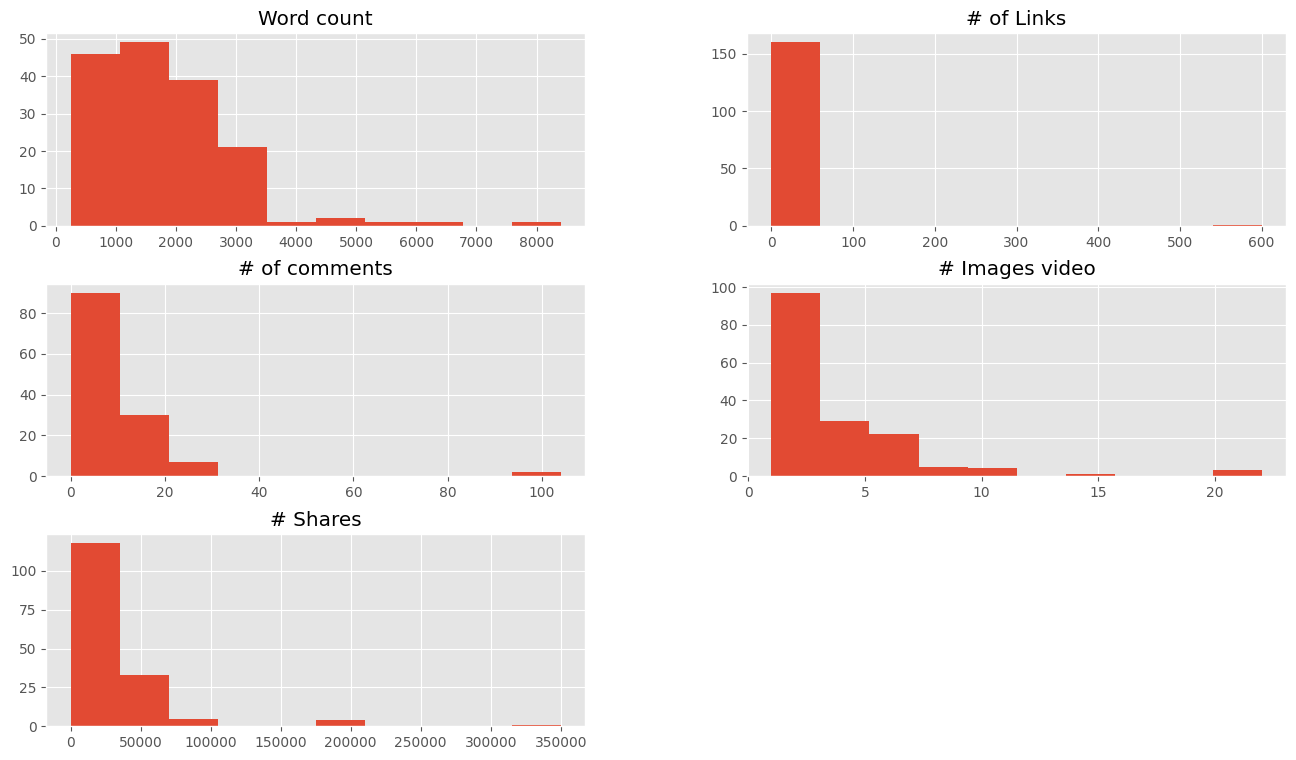

In [6]:
# Visualizamos rápidamente las caraterísticas de entrada
data.drop(['Title','url', 'Elapsed days'],axis=1).hist()
plt.show()

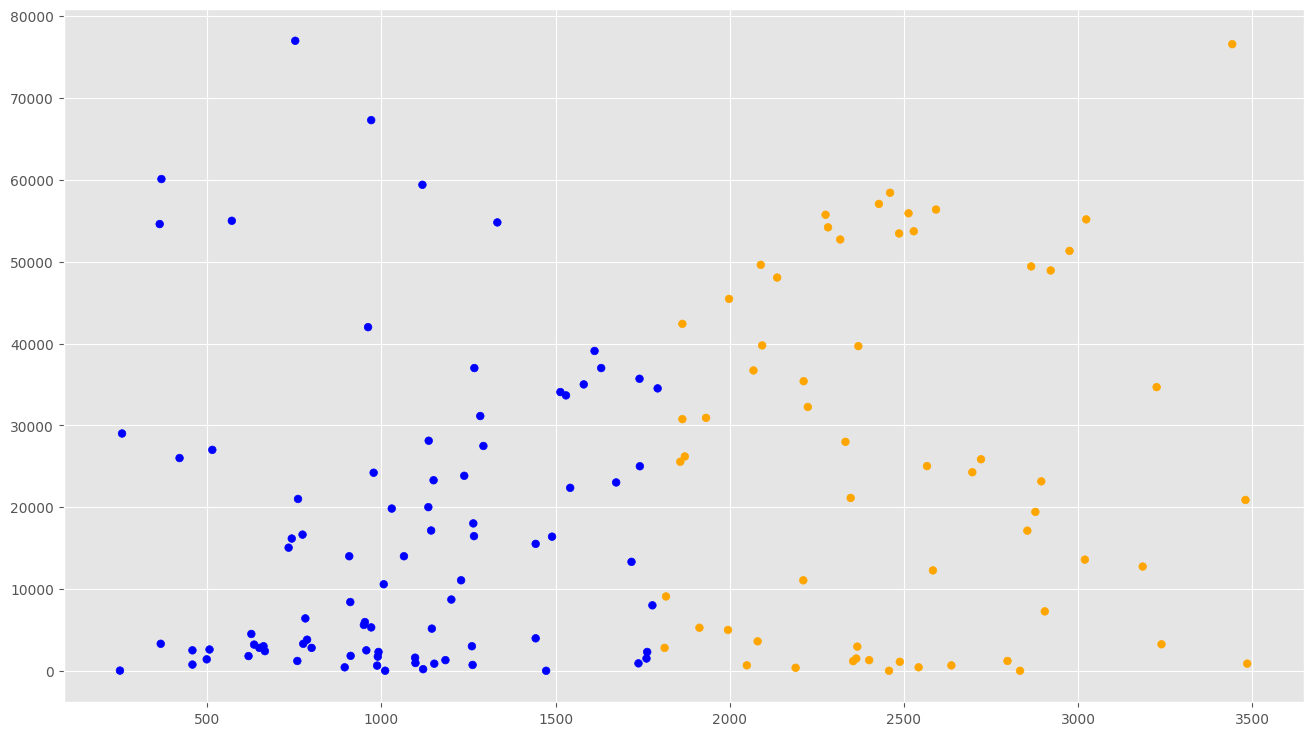

In [7]:
 #VamosaRECORTARlos datosenlazonadondese concentranmáslospuntos
 #estoesenelejeX: entre0y3.500
 #yenelejeY:entre 0 y80.000
filtered_data=data[(data['Word count']<=3500)&(data['# Shares']<=80000)]

colores=['orange','blue']
tamanios=[30,60]

f1=filtered_data['Word count'].values
f2=filtered_data['# Shares'].values

 #VamosapintarencoloreslospuntospordebajoyporencimadelamediadeCantidaddePalabras
asignar = []

for index, row in filtered_data.iterrows():
    if row['Word count'] > 1808:
        asignar.append(colores[0])  # Naranja si es mayor a 1808
    else:
        asignar.append(colores[1])  # Azul si es menor o igual a 1808

# Ahora asignar tiene la misma cantidad de elementos que filtered_data
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [8]:
 #AsignamosnuestravariabledeentradaXpara entrenamientoylasetiquetasY.
dataX=filtered_data[["Word count"]]
X_train=np.array(dataX)
y_train=filtered_data['# Shares'].values
 #Creamoselobjetode RegresiónLinear
regr=linear_model.LinearRegression()
  #Entrenamosnuestromodelo
regr.fit(X_train,y_train)
 #Hacemoslasprediccionesqueen definitivauna línea(enestecaso,alser2D)
y_pred=regr.predict(X_train)

 #Veamosloscoeficienetesobtenidos,Ennuestro caso,seránlaTangente
print('Coefficients:\n',regr.coef_)
 #Esteeselvalordonde cortael ejeY(enX=0)
print('Independentterm:\n',regr.intercept_)
 #ErrorCuadradoMedio
print("Meansquarederror:%.2f"%mean_squared_error(y_train,y_pred))
 #PuntajedeVarianza. Elmejorpuntajeesun1.0
print('Variancescore:%.2f'%r2_score(y_train,y_pred))

Coefficients:
 [5.69765366]
Independentterm:
 11200.30322307416
Meansquarederror:372888728.34
Variancescore:0.06


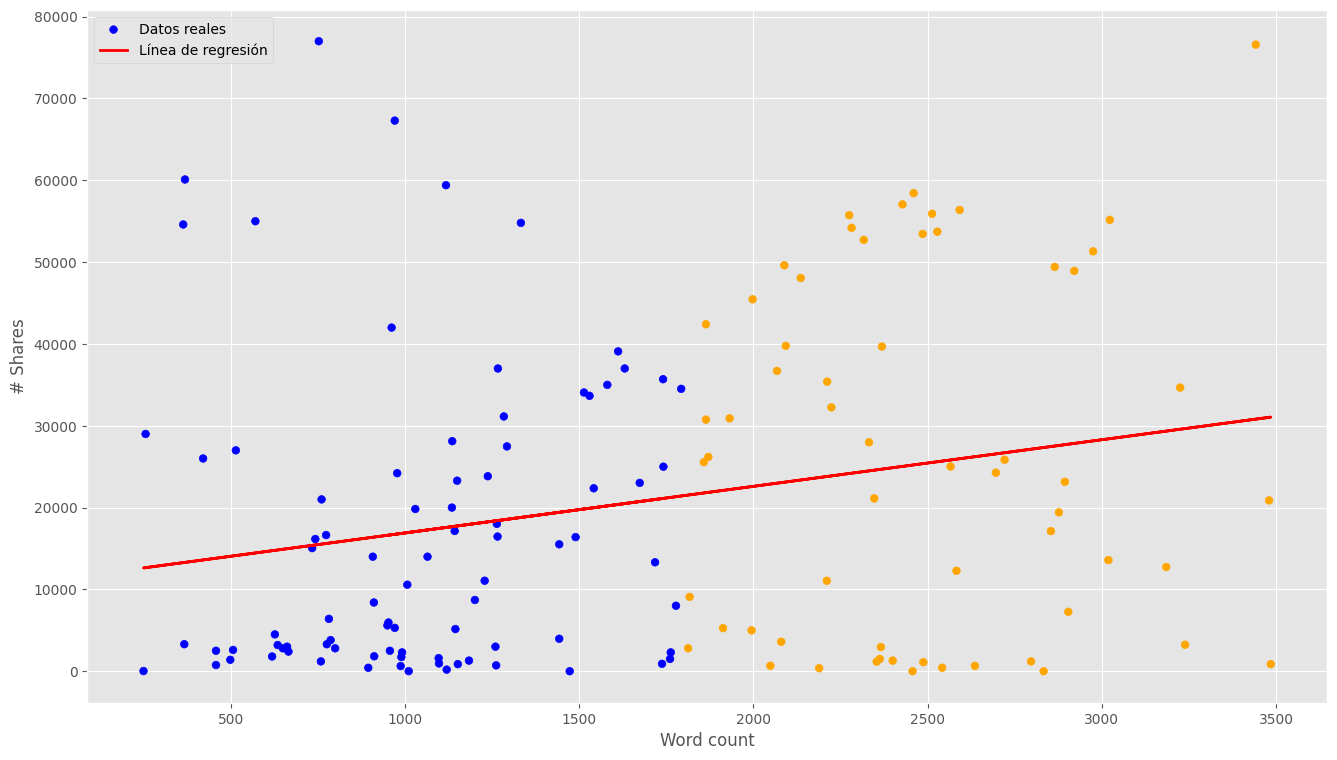

In [13]:
# Graficar scatter plot
plt.scatter(f1, f2, c=asignar, s=tamanios[0], label="Datos reales")

# Graficar línea de regresión
plt.plot(X_train, y_pred, color='red', linewidth=2, label="Línea de regresión")

# Etiquetas y leyenda
plt.xlabel("Word count")
plt.ylabel("# Shares")
plt.legend()
plt.show()

In [9]:
 #Vamos a comprobar:
# Quiero predecir cuántos "Shares" voy a obtener por un artículo con 2.000 palabras,
# según nuestro modelo, hacemos:
y_Dosmil = regr.predict([[2000]])
print(int(y_Dosmil))

22595


C:\Users\hmisa\AppData\Local\Temp\ipykernel_20000\1499447619.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(y_Dosmil))


In [10]:
#Iniciamos con la actvidad 10 a partir de aquí

In [11]:

#Vamos a intentar mejorar el Modelo, con una dimensión más:
# Para poder graficar en 3D, haremos una variable nueva que será la suma de los enlaces, comentarios e imágenes

suma = (filtered_data["# of Links"] + filtered_data['# of comments'].fillna(0) + filtered_data['# Images video'])
dataX2 = pd.DataFrame()
dataX2["Word count"] = filtered_data["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data['# Shares'].values

In [12]:
 # Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()

 # Entrenamos el modelo, esta vez, con 2 dimensiones
 # obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)

 # Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
  # Los coeficientes
print('Coefficients: \n', regr2.coef_)
  # Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
  # Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [   6.63216324 -483.40753769]
Mean squared error: 352122816.48
Variance score: 0.11


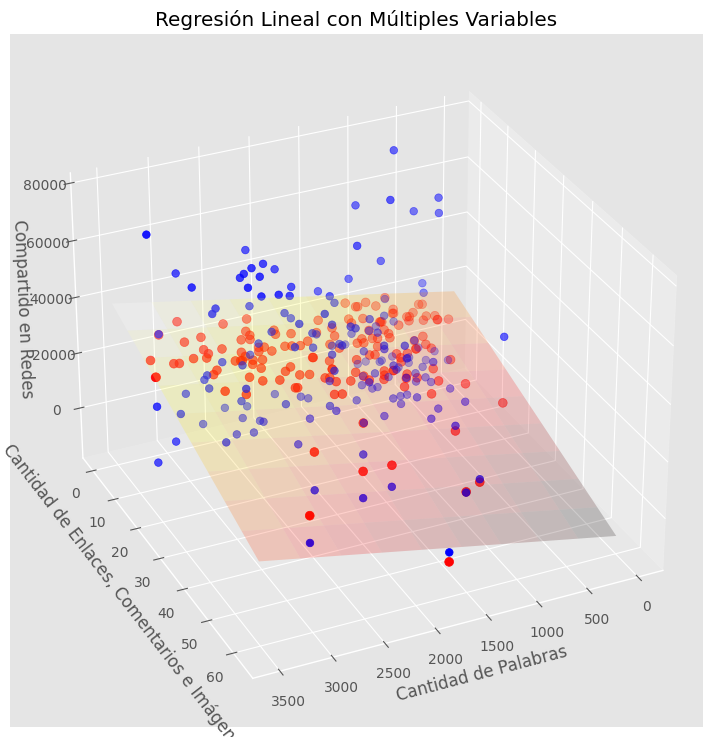

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Crea la figura
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Creamos una malla, sobre la cual graficaremos el plano
xx, yy = np.meshgrid(np.linspace(0, 3500, num=10), np.linspace(0, 60, num=10))

# Calculamos los valores del plano para los puntos x e y
nuevoX = (regr2.coef_[0] * xx)
nuevoY = (regr2.coef_[1] * yy)

# Calculamos los correspondientes valores para z. Debemos sumar el punto de intersección
z = (nuevoX + nuevoY + regr2.intercept_)

# Graficamos el plano
ax.plot_surface(xx, yy, z, alpha=0.2, cmap='hot')

# Graficamos en azul los puntos en 3D
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_train, c='blue', s=30)

# Graficamos en rojo, los puntos predichos
ax.scatter(XY_train[:, 0], XY_train[:, 1], z_pred, c='red', s=40)

# Configuración de la vista
ax.view_init(elev=30., azim=65)
ax.set_xlabel('Cantidad de Palabras')
ax.set_ylabel('Cantidad de Enlaces, Comentarios e Imágenes')
ax.set_zlabel('Compartido en Redes')
ax.set_title('Regresión Lineal con Múltiples Variables')

# Mostrar el gráfico
plt.show()


In [19]:
 # Si quiero predecir cuántos "Shares" voy a obtener por un artículo con:
# 2000 palabras y con enlaces: 10, comentarios: 4, imagenes: 6
# según nuestro modelo, hacemos:
z_Dosmil = regr2.predict([[2000, 10+4+6]])
print(int(z_Dosmil))

20518


C:\Users\hmisa\AppData\Local\Temp\ipykernel_20000\4074493490.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(int(z_Dosmil))
